# Just Some of Analysis 😃

In [303]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os
from scipy import stats

# Reading The Data 

In [2]:
data = pd.read_csv(r'I:\Python\dataSet\ml\US Accidents\US_Accidents_Dec21_updated.csv') 
df = data.copy()
df.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night


In [4]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

# Check The Null Data, Duplicated Data and Remove All of Them 

In [6]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [7]:
df.shape

(2845342, 47)

In [8]:
df.dropna(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
R

In [11]:
df.shape

(943318, 47)

# Adding All Columns Which Have Data Type == float

In [12]:
intFloat_data = []
for i in df.columns:
    if (df[i].dtype == np.float64):
        intFloat_data.append(i)
intFloat_data

['Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Number',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

# Delete The Outliers From Data

In [13]:
def find_outliers(data ,column_name):
    q1 = np.quantile(data[column_name], 0.25)
    q3 = np.quantile(data[column_name], 0.75)
    iqr = (q3-q1)*1.5
    min_q = q1 - iqr
    max_q = q3 + iqr
    return min_q, max_q

def removeOutliers(data, col, min_q, max_q):
    data[(data[col] < min_q)] = np.nan
    data[(data[col] > max_q)] = np.nan
    data.dropna(subset=[col], inplace=True)
    print(f'the data less than {min_q} and more than {max_q} is the outlier data for column name {col}')
    return data

In [17]:
for i in intFloat_data:
    min_q, max_q = find_outliers(df,i)
    removeOutliers(df, i, min_q, max_q)

the data less than 16.725873124999993 and more than 52.73676412500001 is the outlier data for column name Start_Lat
the data less than -174.04413875 and more than -24.14868074999999 is the outlier data for column name Start_Lng
the data less than 16.72645575 and more than 52.736425749999995 is the outlier data for column name End_Lat
the data less than -174.04601449999998 and more than -24.146658500000022 is the outlier data for column name End_Lng
the data less than -0.28250000000000003 and more than 0.5775 is the outlier data for column name Distance(mi)
the data less than -10476.5 and more than 20663.5 is the outlier data for column name Number
the data less than 14.0 and more than 118.0 is the outlier data for column name Temperature(F)
the data less than 14.0 and more than 118.0 is the outlier data for column name Wind_Chill(F)
the data less than -0.5 and more than 131.5 is the outlier data for column name Humidity(%)
the data less than 28.390000000000008 and more than 30.94999999

In [18]:
df.isna().sum()

ID                       0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Number                   0
Street                   0
Side                     0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
R

In [19]:
df.shape

(584230, 47)

In [20]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
3928,A-3929,4.0,2016-05-25 16:16:48,2016-05-25 22:16:48,35.691160,-121.289500,35.695743,-121.293199,0.379,Closed at San Luis Obispo/Monterey - Road clos...,...,False,False,False,False,False,False,Day,Day,Day,Day
5864,A-5865,2.0,2016-04-01 10:08:54,2016-04-01 16:08:54,33.880116,-116.991175,33.883945,-116.990732,0.266,At I-10/San Bernardino Fwy - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
9857,A-9858,2.0,2016-05-25 17:12:38,2016-05-25 23:12:38,34.375830,-118.491250,34.375831,-118.491251,0.000,At Sand Canyon Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
11853,A-11854,4.0,2016-12-01 06:59:43,2016-12-01 12:59:43,30.270003,-90.942407,30.269450,-90.941900,0.049,Closed at Myrza St - Road closed due to accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
13036,A-13037,3.0,2016-12-12 09:06:01,2016-12-12 15:06:01,33.508680,-94.616460,33.505150,-94.607870,0.552,Between FM-992/N Runnels St and Pine St - Acci...,...,False,False,False,False,True,False,Day,Day,Day,Day


# Take Sample from Data

In [297]:
sample_data = df.groupby('Severity').sample(frac=0.05, random_state=2024)
sample_data.head(2)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2100362,A-2100363,1.0,2020-05-05 16:35:25,2020-05-05 16:50:25,45.49706,-122.53765,45.49706,-122.53765,0.0,At I-205/Veterans Memorial Hwy - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
2231783,A-2231784,1.0,2020-04-01 15:55:19,2020-04-01 16:40:19,30.49268,-91.15556,30.49268,-91.15556,0.0,At I-110 - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day


In [298]:
sample_data.shape

(29211, 47)

# Check Which Sample Data is Better by Using Cooficient Variation

In [328]:
ts = df.groupby('Severity').sample(frac=0.01, random_state=2024)
# cofficient variation
x = (sample_data['Temperature(F)'].std() / abs(sample_data['Temperature(F)'].mean())) * 100
y = (ts['Temperature(F)'].std() / abs(ts['Temperature(F)'].mean())) * 100
x,y

(23.767966891759578, 23.819795393619188)

# Using Confidence Interval For Proofing The Sample ~ Population 

* CI for numerical data

In [343]:
sample_data['Temperature(F)'].mean()

67.6320050665845

In [329]:
mean_sample = sample_data['Temperature(F)'].mean()
std_sample =  sample_data['Temperature(F)'].std()
degree_freedom = len(sample_data) 
alpha = 0.95
confidence_level = (1 - alpha) / 2
t_score = stats.t.ppf(confidence_level, df=degree_freedom - 1)
std_error = t_score * (std_sample/np.sqrt(degree_freedom))
[mean_sample + std_error, mean_sample - std_error]

[67.4476576008751, 67.81635253229389]

In [341]:
ci = stats.t.interval(confidence= alpha, df=degree_freedom-1, loc=mean_sample, scale=stats.sem(sample_data['Temperature(F)']))
print(f'95% of confidence interval of mean is between {ci}')

95% of confidence interval of mean is between (67.4476576008751, 67.81635253229389)


* CI for categorical data (proportion)

In [344]:
sample_data['Side'].value_counts(normalize=True)

Side
R    0.551813
L    0.448187
Name: proportion, dtype: float64

In [347]:
p = (sample_data['Side']=='R').mean()
t_score_proportion = stats.t.ppf(confidence_level, df=degree_freedom - 1)
std_error_proportion = t_score_proportion * (np.sqrt((p*(1-p)/degree_freedom)))
[p + std_error_proportion, p - std_error_proportion]

[0.546109474696597, 0.5575158719194039]

In [350]:
sample_data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,29211.000000,29211.000000,29211.000000,29211.000000,29211.000000,29211.000000,29211.000000,29211.000000,29211.000000,29211.000000,29211.000000,29211.0,29211.000000,29211.0
mean,2.046352,33.596472,-91.181299,33.596595,-91.181158,0.132774,5086.466194,67.632005,67.147061,61.764267,29.726136,10.0,7.121393,0.0
std,0.334547,5.440267,16.234983,5.440313,16.234915,0.126973,4888.283028,16.074753,16.994862,19.894471,0.397909,0.0,4.783343,0.0
min,1.000000,24.711054,-124.350190,24.709143,-124.350190,0.000000,1.000000,14.000000,14.000000,2.000000,28.400000,10.0,0.000000,0.0
25%,2.000000,28.545426,-96.834688,28.545973,-96.835721,0.038000,1101.000000,56.000000,56.000000,48.000000,29.490000,10.0,3.000000,0.0
50%,2.000000,33.983327,-82.349599,33.983026,-82.347827,0.098000,3424.000000,70.000000,70.000000,63.000000,29.860000,10.0,7.000000,0.0
75%,2.000000,37.635317,-80.303788,37.635177,-80.303877,0.185000,7929.500000,80.000000,80.000000,77.000000,30.010000,10.0,10.000000,0.0
max,4.000000,48.964750,-68.674910,48.964400,-68.674072,0.577000,20647.000000,111.000000,111.000000,100.000000,30.630000,10.0,20.000000,0.0


# Level of Accidents

In [24]:
level_of_accedient = sample_data['Severity'].value_counts(normalize=True).reset_index().sort_values(by='proportion')
level_of_accedient

,Severity,proportion
3,1.0,0.011715
2,3.0,0.013765
1,4.0,0.022163
0,2.0,0.952358


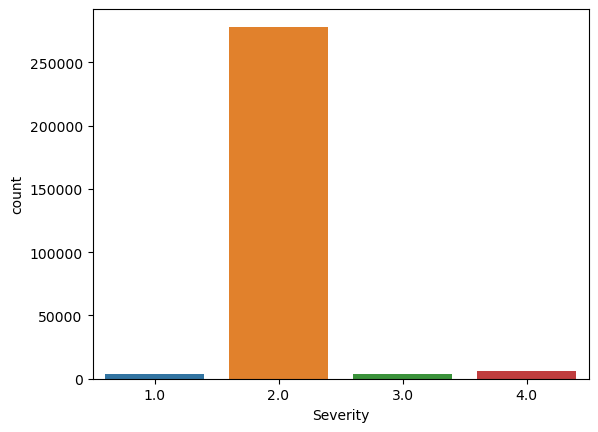

In [25]:
sns.countplot(data=sample_data, x=sample_data.Severity)
plt.show()

# Proportion's Level of Accidents

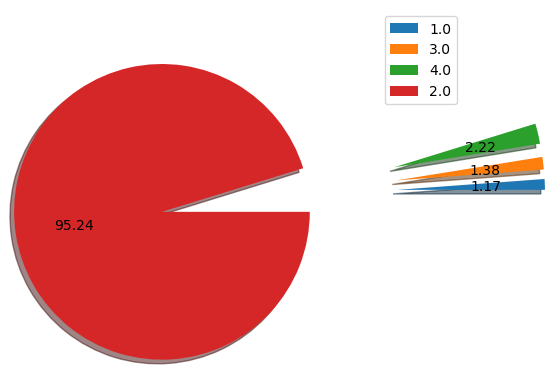

In [26]:
plt.pie(level_of_accedient.proportion,shadow=True, autopct='%.2f',explode=[0.8,0.8,0.8,0.8] )
plt.legend(level_of_accedient.Severity)
plt.show()

# Convert all data of time to date type

In [27]:
sample_data['Start_Time'].astype('object')

2100362              2020-05-05 16:35:25
2231783              2020-04-01 15:55:19
2274416              2020-04-24 08:53:06
2215430              2020-03-23 18:00:00
2151287              2020-06-28 08:50:42
                       ...              
1029050              2021-08-26 14:31:33
1742594    2020-10-30 15:58:00.000000000
2799233              2019-04-30 18:08:49
2502660              2019-03-12 11:00:13
1076610              2021-08-13 21:29:00
Name: Start_Time, Length: 292115, dtype: object

In [366]:
sample_data['Start_Time'] = pd.to_datetime(sample_data['Start_Time'], format='mixed')

In [367]:
sample_data['years'] = sample_data['Start_Time'].dt.year
sample_data['months'] = sample_data['Start_Time'].dt.month
sample_data['days'] = sample_data['Start_Time'].dt.day
sample_data['hours'] = sample_data['Start_Time'].dt.hour

# Convert the hour from 24 to 12

In [368]:
def convertTime(x):
    if x <= 12:
        return x
    else:
        return x - 12
sample_data['hours'] = sample_data['hours'].map(lambda x: convertTime(x))

# The Most year and month have number of accident

In [369]:
sample_data['count'] = 1
sample_data.groupby(['years', 'months'])['count'].sum().reset_index().nlargest(3,'count')

,years,months,count
52,2021,12,3653
51,2021,11,2910
50,2021,10,2451


In [32]:
sample_data.groupby(['years', 'months', 'days'])['count'].count().reset_index().nlargest(3,'count')

,years,months,days,count
1235,2021,12,17,2059
1241,2021,12,23,1943
1221,2021,12,3,1762


In [33]:
set(sample_data['years'].values)

{2016, 2017, 2018, 2019, 2020, 2021}

In [34]:
data_2021 = sample_data[sample_data['years']==2021]
data_2021_months = data_2021['months'].value_counts().reset_index()
data_2021_months

,months,count
0,12,35438
1,11,29080
2,10,24276
3,9,21378
4,6,17121
5,8,16673
6,7,14670
7,1,14293
8,2,11880
9,5,11314


# Number of accident from 2019 to 2021 over all months

In [35]:
data_years_months_days = sample_data[['years', 'months', 'days']].value_counts().reset_index()
data_years_months_days

,years,months,days,count
0,2021,12,17,2059
1,2021,12,23,1943
2,2021,12,3,1762
3,2021,12,16,1577
4,2021,12,22,1549
...,...,...,...,...
1245,2018,7,27,1
1246,2018,7,26,1
1247,2018,7,8,1
1248,2018,7,4,1


C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


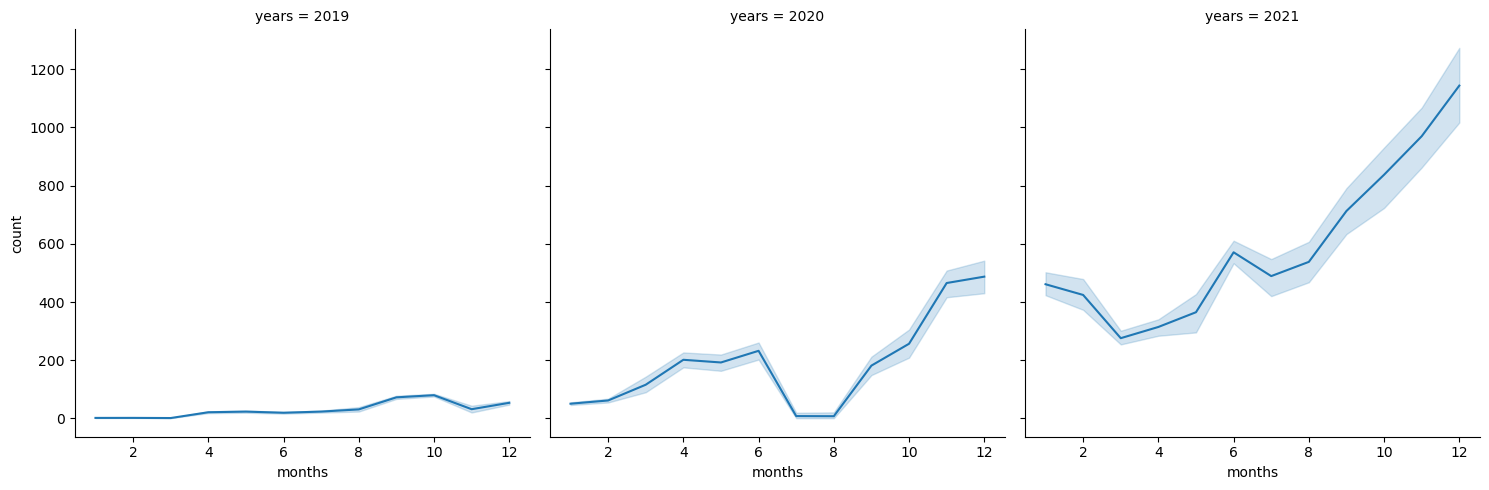

In [352]:
data_years_months_days_19_21 = data_years_months_days[data_years_months_days['years'].isin([2019,2020,2021])]
sns.relplot(data=data_years_months_days_19_21, kind='line', x='months', y='count', col='years')
plt.show()

# The Most Street has Number of accident from 2019 to 2021 over all months

In [37]:
data_years_months_days_street = sample_data.groupby(['years', 'months', 'Street'])['count'].sum().reset_index().sort_values(by='count', ascending=False)
data_years_months_days_street = data_years_months_days_street.iloc[:11, :]
data_years_months_days_street

,years,months,Street,count
141391,2021,12,S Orange Blossom Trl,590
141184,2021,12,S Dixie Hwy,328
130332,2021,11,S Orange Blossom Trl,272
143340,2021,12,W Cary St,264
134103,2021,12,Biscayne Blvd,255
141888,2021,12,SW 87th Ave,229
141897,2021,12,SW 8th St,222
119642,2021,10,S Orange Blossom Trl,219
130122,2021,11,S Dixie Hwy,202
135621,2021,12,E Colonial Dr,202


C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


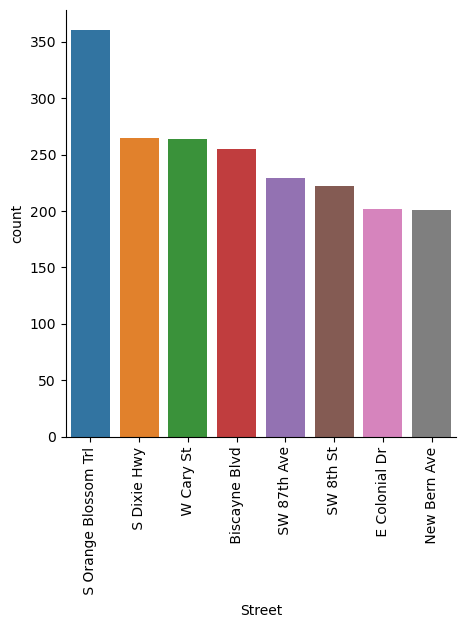

In [38]:
sns.catplot(kind='bar', data=data_years_months_days_street, x='Street', y='count', errorbar=None)
plt.xticks(rotation=90)
plt.show()

In [128]:
data_2020 = sample_data[sample_data['years']==2020]
data_2019 = sample_data[sample_data['years']==2019]

# Grouping by City

In [126]:
data_years_months_days_city = sample_data.groupby(['years', 'months', 'days','hours', 'City'])['count'].sum().reset_index().sort_values(by='count', ascending=False)
data_years_months_days_city

,years,months,days,hours,City,count
68725,2021,1,26,4,Miami,139
181056,2021,12,17,2,Orlando,74
178537,2021,12,13,3,Miami,69
67314,2021,1,22,1,Miami,64
158195,2021,11,3,5,Miami,62
...,...,...,...,...,...,...
67851,2021,1,23,5,Piedmont,1
67853,2021,1,23,5,Rosemead,1
67854,2021,1,23,5,Sanger,1
67855,2021,1,23,5,Seattle,1


# Number of Acc by city In 2021

In [208]:
data_years_months_days_city_21 = data_2021.groupby(['months','days','hours', 'City'])['count'].sum().reset_index().sort_values(by='count', ascending=False)
data_years_months_days_city_21.nlargest(10,'count')

,months,days,hours,City,count
7761,1,26,4,Miami,139
120092,12,17,2,Orlando,74
117573,12,13,3,Miami,69
6350,1,22,1,Miami,64
5211,1,19,1,Miami,62
97231,11,3,5,Miami,62
122764,12,22,3,Miami,60
119490,12,16,4,Orlando,60
112629,12,3,4,Miami,54
31796,5,5,5,Miami,53


# The Most City has Acc

In [196]:
data_most_10_city_21 = data_years_months_days_city_21['City'].value_counts().reset_index().nlargest(10,'count')
data_most_10_city_21

,City,count
0,Miami,3535
1,Orlando,2897
2,Houston,2591
3,Dallas,2284
4,Raleigh,2129
5,Los Angeles,2019
6,Baton Rouge,1763
7,Charlotte,1762
8,Austin,1686
9,New Orleans,1613


C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


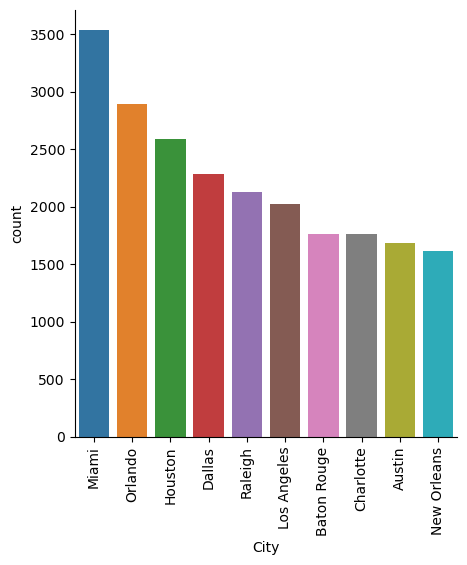

In [197]:
sns.catplot(kind='bar', data=data_most_10_city_21, x='City', y='count')
plt.xticks(rotation=90)
plt.show()

# Grouping in 2020

In [210]:
data_years_months_days_city_20 = data_2020.groupby(['years', 'months', 'days','hours', 'City'])['count'].sum().reset_index().sort_values(by='count', ascending=False)
data_years_months_days_city_20

,years,months,days,hours,City,count
47577,2020,12,23,1,Miami,50
26689,2020,10,19,12,Miami,44
42610,2020,12,9,1,Miami,43
42984,2020,12,10,1,Miami,40
38129,2020,11,24,2,Miami,39
...,...,...,...,...,...,...
18012,2020,6,11,6,Rockville,1
18013,2020,6,11,6,San Antonio,1
18014,2020,6,11,6,San Francisco,1
18016,2020,6,11,7,Amenia,1


In [211]:
data_most_10_city_20 = data_years_months_days_city_20['City'].value_counts().reset_index().nlargest(10,'count')
data_most_10_city_20

,City,count
0,Charlotte,1082
1,Miami,1062
2,Los Angeles,1045
3,Orlando,895
4,Raleigh,835
5,Houston,712
6,Baton Rouge,678
7,Austin,652
8,Nashville,640
9,Rochester,624


C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


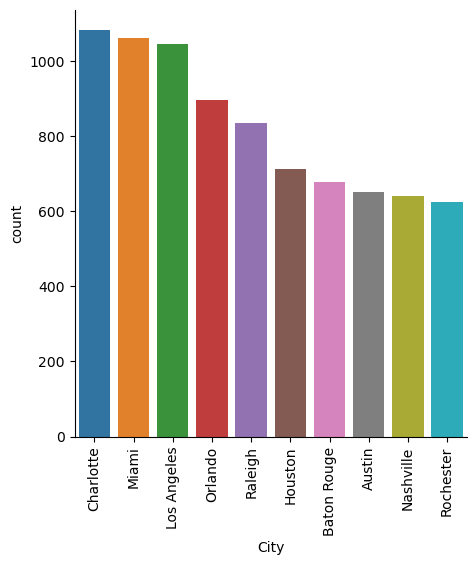

In [212]:
sns.catplot(kind='bar', data=data_most_10_city_20, x='City', y='count')
plt.xticks(rotation=90)
plt.show()

# Showing Side of Acc 

In [219]:
data_years_months_days_side = sample_data.groupby(['years', 'months', 'Side'])['count'].sum().reset_index().sort_values(by='count', ascending=False)
data_years_months_days_side

,years,months,Side,count
129,2021,12,R,19302
127,2021,11,R,16190
128,2021,12,L,16136
125,2021,10,R,13451
126,2021,11,L,12890
...,...,...,...,...
24,2017,6,L,1
30,2017,10,R,1
1,2016,4,R,1
45,2018,6,R,1


In [220]:
data_years_months_days_side_21 = data_2021.groupby(['years', 'months', 'Side'])['count'].sum().reset_index().sort_values(by='count', ascending=False)
data_years_months_days_side_21

,years,months,Side,count
23,2021,12,R,19302
21,2021,11,R,16190
22,2021,12,L,16136
19,2021,10,R,13451
20,2021,11,L,12890
17,2021,9,R,12109
18,2021,10,L,10825
11,2021,6,R,9764
16,2021,9,L,9269
15,2021,8,R,9258


In [222]:
data_years_months_days_side_prop_21 = data_2021['Side'].value_counts().reset_index()
data_years_months_days_side_prop_21

,Side,count
0,R,120270
1,L,93834


C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


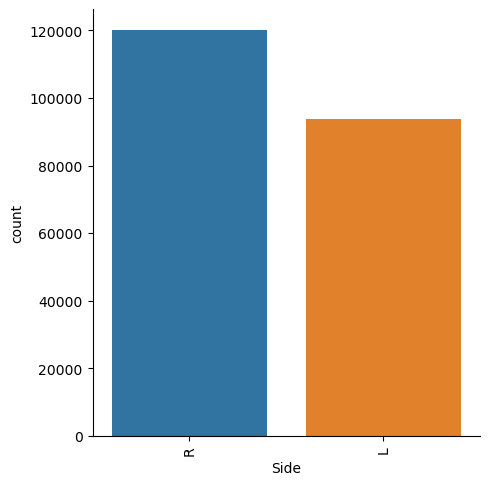

In [223]:
sns.catplot(kind='bar', data=data_years_months_days_side_prop_21, x='Side', y='count')
plt.xticks(rotation=90)
plt.show()

# Merge Data to get Correlation between them 

In [89]:
intFloat_data.append('Severity')

In [80]:
intFloat_data
data_cor = pd.DataFrame()
for i in intFloat_data:
    new_data = sample_data[i]
    data_cor = pd.concat([data_cor,new_data], axis=1)
data_cor

,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Severity
2100362,45.497060,-122.537650,45.497060,-122.537650,0.000,3499.0,74.0,74.0,35.0,30.00,10.0,17.0,0.0,1.0
2231783,30.492680,-91.155560,30.492680,-91.155560,0.000,3446.0,73.0,73.0,37.0,29.92,10.0,3.0,0.0,1.0
2274416,37.516410,-77.474150,37.516410,-77.474150,0.000,3998.0,62.0,62.0,100.0,29.36,10.0,8.0,0.0,1.0
2215430,28.428150,-81.404720,28.428150,-81.404720,0.000,9300.0,87.0,87.0,39.0,30.02,10.0,10.0,0.0,1.0
2151287,33.451420,-112.134510,33.451420,-112.134510,0.000,299.0,86.0,86.0,18.0,28.58,10.0,12.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029050,33.975411,-86.757696,33.980485,-86.755677,0.369,699.0,89.0,89.0,55.0,29.43,10.0,7.0,0.0,4.0
1742594,37.916988,-77.986671,37.919987,-77.984774,0.232,8692.0,58.0,58.0,52.0,29.55,10.0,9.0,0.0,4.0
2799233,38.942080,-77.018590,38.942040,-77.020020,0.077,445.0,78.0,78.0,50.0,30.13,10.0,5.0,0.0,4.0
2502660,38.930810,-94.526650,38.932970,-94.522790,0.256,1070.0,46.0,41.4,96.0,30.16,10.0,9.2,0.0,4.0


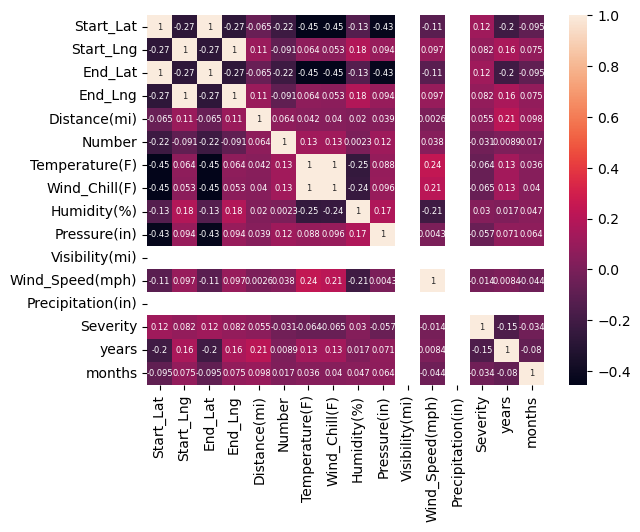

In [90]:
data_correlation = data_cor.corr()
sns.heatmap(data_correlation, annot=True, annot_kws={'size': 6})
plt.show()

# Impact of weather

In [229]:
data_years_months_days_19_21_corr_weather = sample_data.groupby(['years','months','days'])[['Wind_Speed(mph)','Temperature(F)','Humidity(%)','Visibility(mi)']].mean().reset_index()
data_years_months_days_19_21_corr_weather

,years,months,days,Wind_Speed(mph),Temperature(F),Humidity(%),Visibility(mi)
0,2016,4,1,0.000000,59.000000,60.000000,10.0
1,2016,4,11,4.600000,43.000000,68.000000,10.0
2,2016,6,28,0.000000,76.000000,94.000000,10.0
3,2016,6,29,10.000000,75.000000,53.000000,10.0
4,2016,6,30,3.000000,86.000000,66.000000,10.0
...,...,...,...,...,...,...,...
1245,2021,12,27,6.791667,66.262963,66.182407,10.0
1246,2021,12,28,7.525626,63.661502,65.845054,10.0
1247,2021,12,29,7.616253,68.244921,72.577878,10.0
1248,2021,12,30,6.350154,67.525232,75.391349,10.0


# Impact of Wind Speed

C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


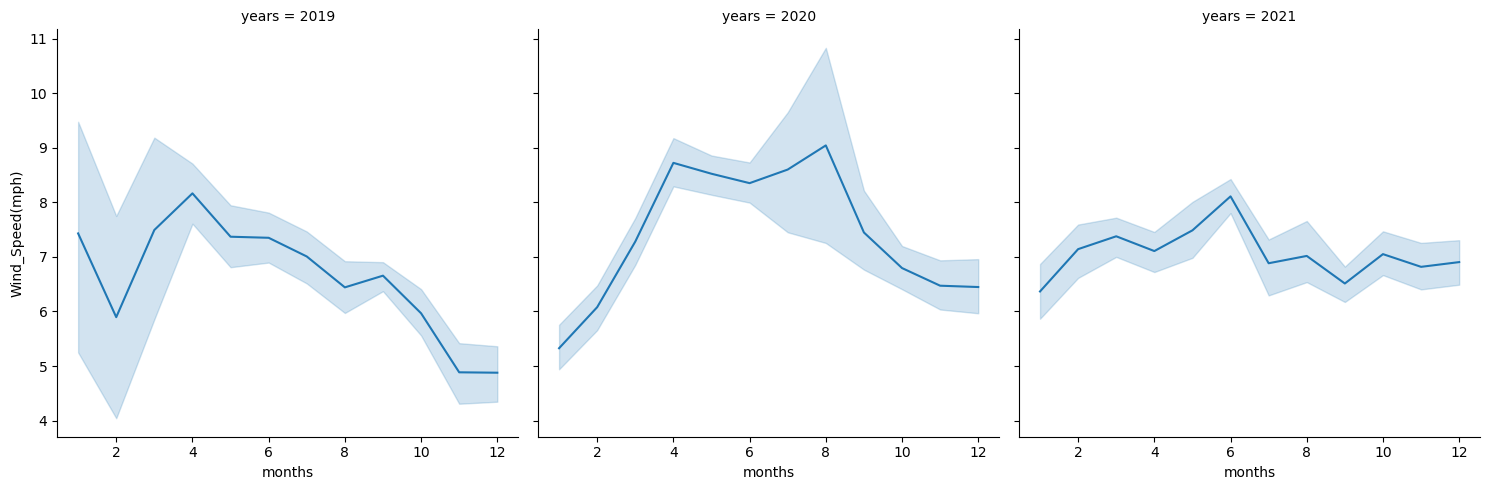

In [226]:
data_years_months_days_19_21_corr_weather = data_years_months_days_19_21_corr_weather[data_years_months_days_19_21_corr_weather['years'].isin([2019,2020,2021])]
sns.relplot(kind='line', data=data_years_months_days_19_21_corr_weather,col='years', x='months',y='Wind_Speed(mph)')
plt.show()

#  Impact of Temperature

C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


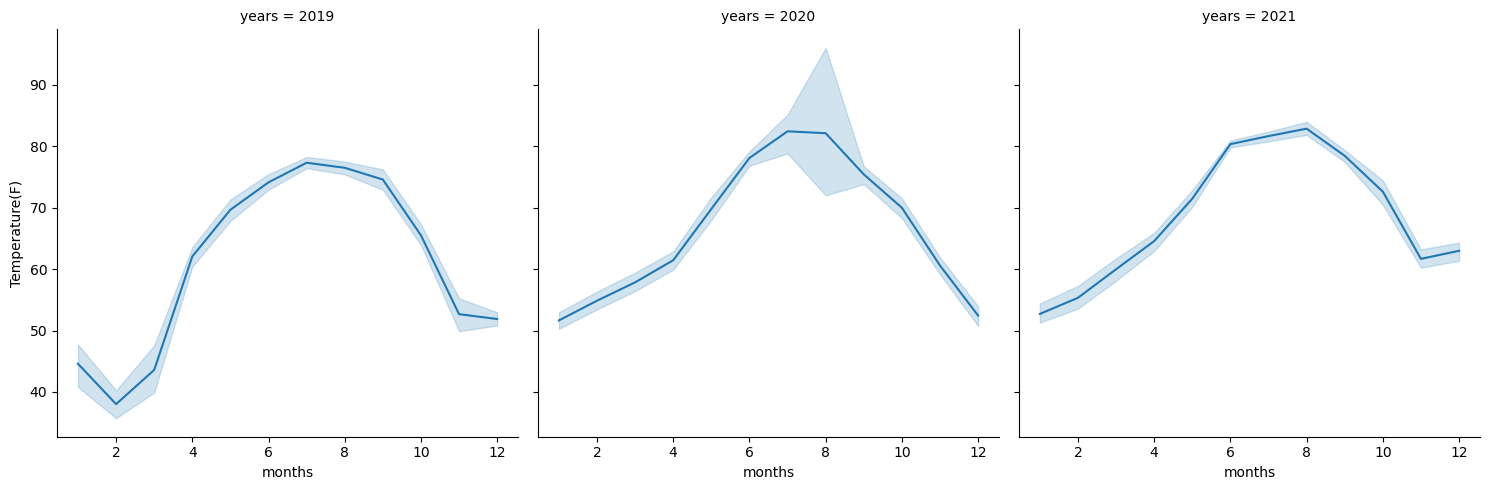

In [100]:
data_years_months_days_19_21_corr_weather = data_years_months_days_19_21_corr_weather[data_years_months_days_19_21_corr_weather['years'].isin([2019,2020,2021])]
sns.relplot(kind='line', data=data_years_months_days_19_21_corr_weather,col='years', x='months',y='Temperature(F)')
plt.show()

# Impact of Humidity

C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


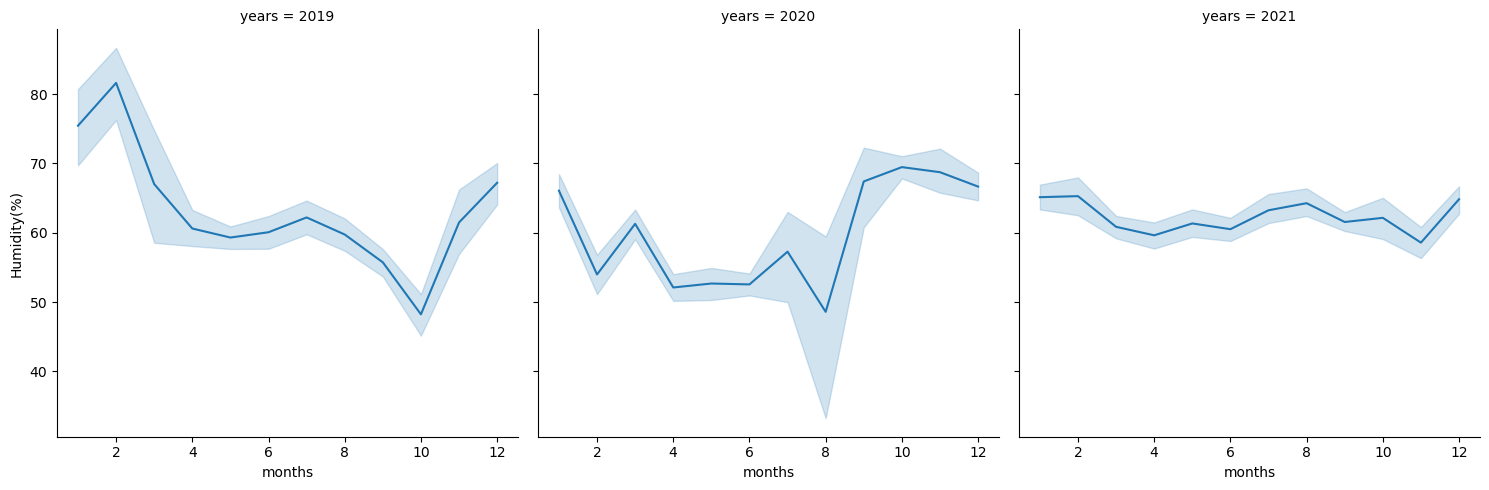

In [357]:
data_years_months_days_19_21_corr_weather = data_years_months_days_19_21_corr_weather[data_years_months_days_19_21_corr_weather['years'].isin([2019,2020,2021])]
sns.relplot(kind='line', data=data_years_months_days_19_21_corr_weather,col='years', x='months',y='Humidity(%)')
plt.show()

# Impact of Traffic

In [371]:
data_traffic = sample_data.groupby(['years','months','days','City','Traffic_Calming','Traffic_Signal'])['count'].sum().reset_index().sort_values(by='count', ascending=False)
data_traffic = data_traffic[data_traffic['years'].isin([2019,202,2021])]
data_traffic

,years,months,days,City,Traffic_Calming,Traffic_Signal,count
20501,2021,12,7,Miami,False,False,31
21175,2021,12,16,Orlando,False,False,29
20999,2021,12,14,Miami,False,False,27
19952,2021,11,29,Miami,False,False,27
21262,2021,12,17,Miami,False,False,26
...,...,...,...,...,...,...,...
7730,2021,1,29,Inglewood,False,False,1
7728,2021,1,29,Hillsboro,False,False,1
7726,2021,1,29,Franklinville,False,False,1
7725,2021,1,29,Fort Myers,False,False,1


# Traffic_Calming by City

In [372]:
data_traffic_calming = data_traffic[['City','Traffic_Calming']].value_counts().reset_index().nlargest(10,'count')
data_traffic_calming

,City,Traffic_Calming,count
0,Miami,False,480
1,Orlando,False,372
2,Los Angeles,False,354
3,Houston,False,307
4,Dallas,False,290
5,Charlotte,False,251
6,Raleigh,False,240
7,Austin,False,215
8,Baton Rouge,False,212
9,New Orleans,False,182


C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


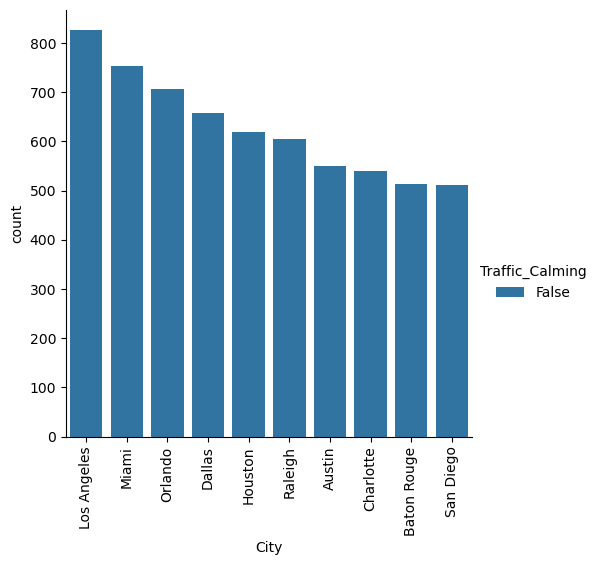

In [359]:
sns.catplot(kind='bar', data=data_traffic_calming, x='City',y='count',hue='Traffic_Calming')
plt.xticks(rotation=90)
plt.show()

# Traffic_Signal by City

In [373]:
data_traffic_signal = data_traffic[['City','Traffic_Signal']].value_counts().reset_index().nlargest(10,'count')
data_traffic_signal

,City,Traffic_Signal,count
0,Miami,False,338
1,Orlando,False,286
2,Houston,False,252
3,Los Angeles,False,251
4,Dallas,False,218
5,Charlotte,False,215
6,Raleigh,False,185
7,Baton Rouge,False,177
8,Austin,False,165
9,New Orleans,False,163


C:\Users\Mohamed Hamde\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


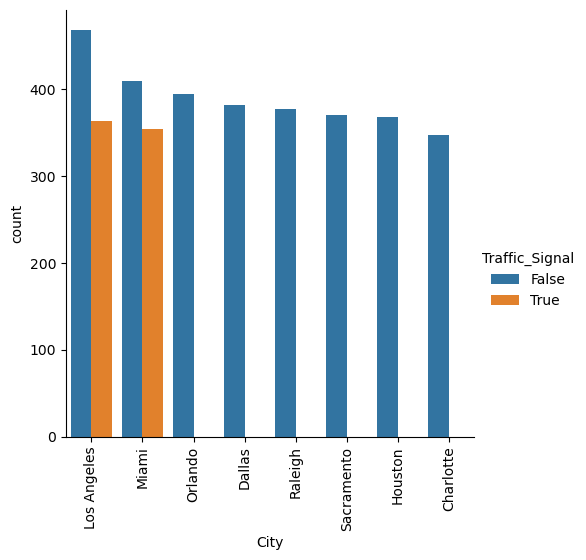

In [255]:
sns.catplot(kind='bar', data=data_traffic_signal, x='City',y='count',hue='Traffic_Signal')
plt.xticks(rotation=90)
plt.show()